In [ ]:
import sklearn
from sklearn.manifold import TSNE
import os
import glob
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

allFiles = glob.glob(os.path.join("*.txt"))


np_array_list = []
column_names = []
column = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0, sep="\t")
    if "2425" or "2426" in file_:
        df.loc[len(df)] = [1 + 0*x for x in range(len(df.iloc[1]))]
    elif "2438" or "2437" in file_:
        df.loc[len(df)] = [2 + 0*x for x in range(len(df.iloc[1]))]
    elif "2434" or "2430" in file_:
        df.loc[len(df)] = [3 + 0*x for x in range(len(df.iloc[1]))]
    elif "244" in file_:
        df.loc[len(df)] = [4 + 0*x for x in range(len(df.iloc[1]))]
    np_array_list.append(df.as_matrix())
    column_names.append(list(df))
    rows = list(df.index)

for z in column_names:
    for i in z:
        column.append(i)

comb_np_array = np.hstack(np_array_list)
gene_df = pd.DataFrame(comb_np_array)
gene_df.columns = column
gene_df.index = rows
gene_df = gene_df.T

gene_df["new_column"] = pd.Series(range(len(gene_df)))
gene_count = len(gene_df["new_column"])
del gene_df["new_column"]


X = np.vstack([gene_df.iloc[i] for i in range(gene_count)])
Y = np.hstack([gene_df[i] for i in gene_df.iloc[0].keys()])


In [9]:
#часть про покраску, генерирую столбец с числами
sp = []
for x in range(gene_count):
    if x % 2 == 0:
        sp.append("aaa")
    else:
        sp.append("bbb")
gene_df["cluster"] = sp


<IPython.core.display.Javascript object>


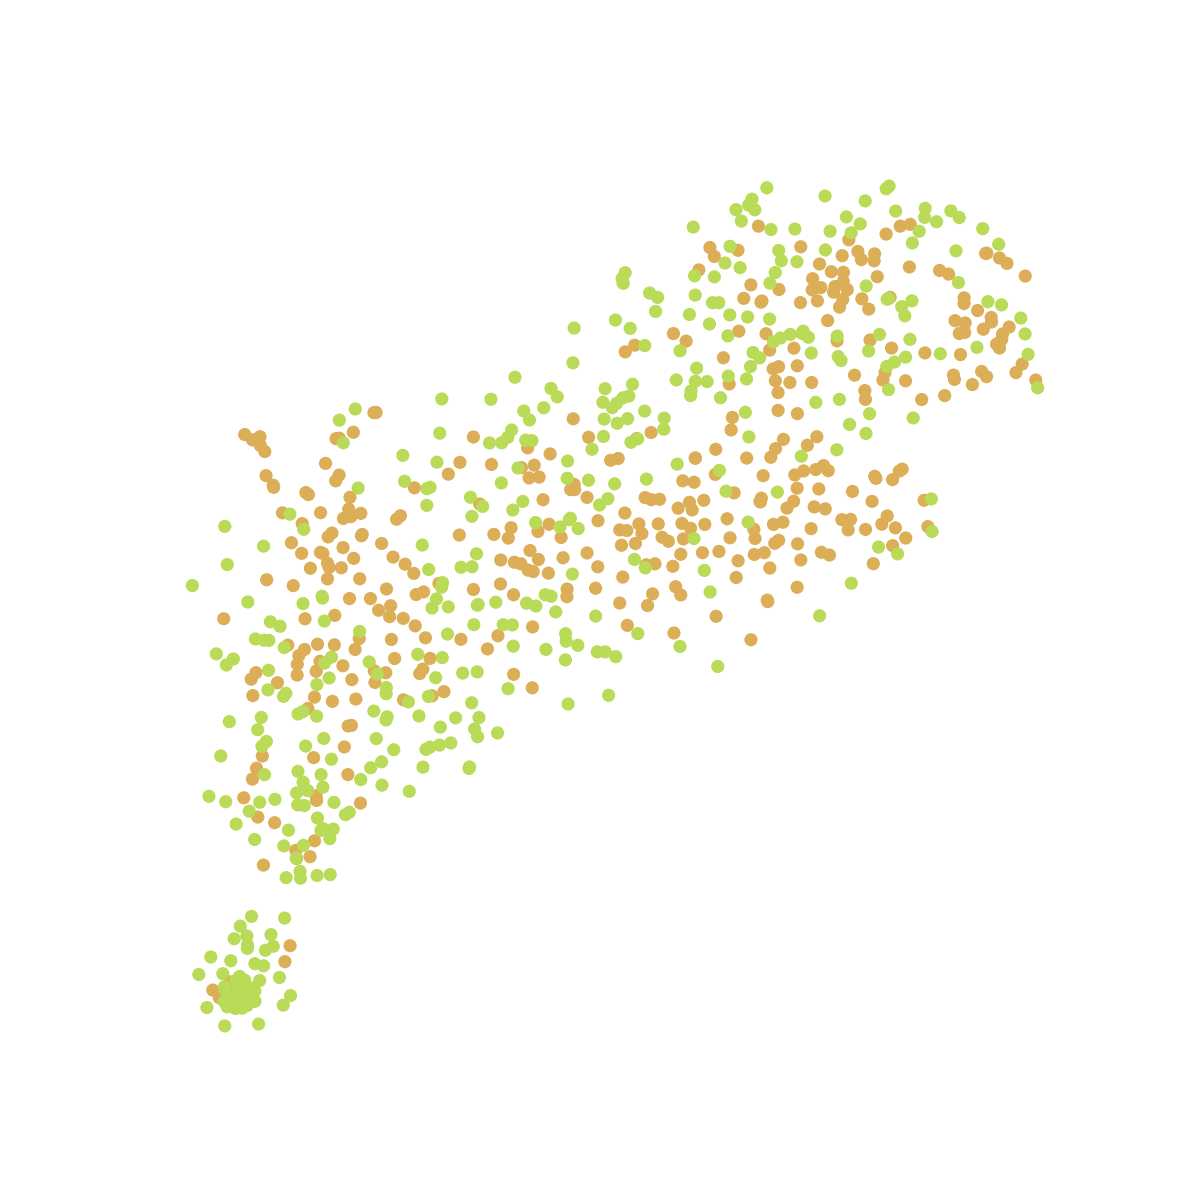

(<matplotlib.figure.Figure at 0x2cb822792b0>,
 <matplotlib.collections.PathCollection at 0x2cb823c4358>)

In [14]:
#непосредственно сама функция для покраски
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    return f, ax, sc

%matplotlib notebook
y = np.hstack([gene_df[34016][gene_df[34016] == i] for i in [1, 2, 3, 4]]) #здесь в списке должны быть встречающиеся значения
scatter(digits, y)


<IPython.core.display.Javascript object>


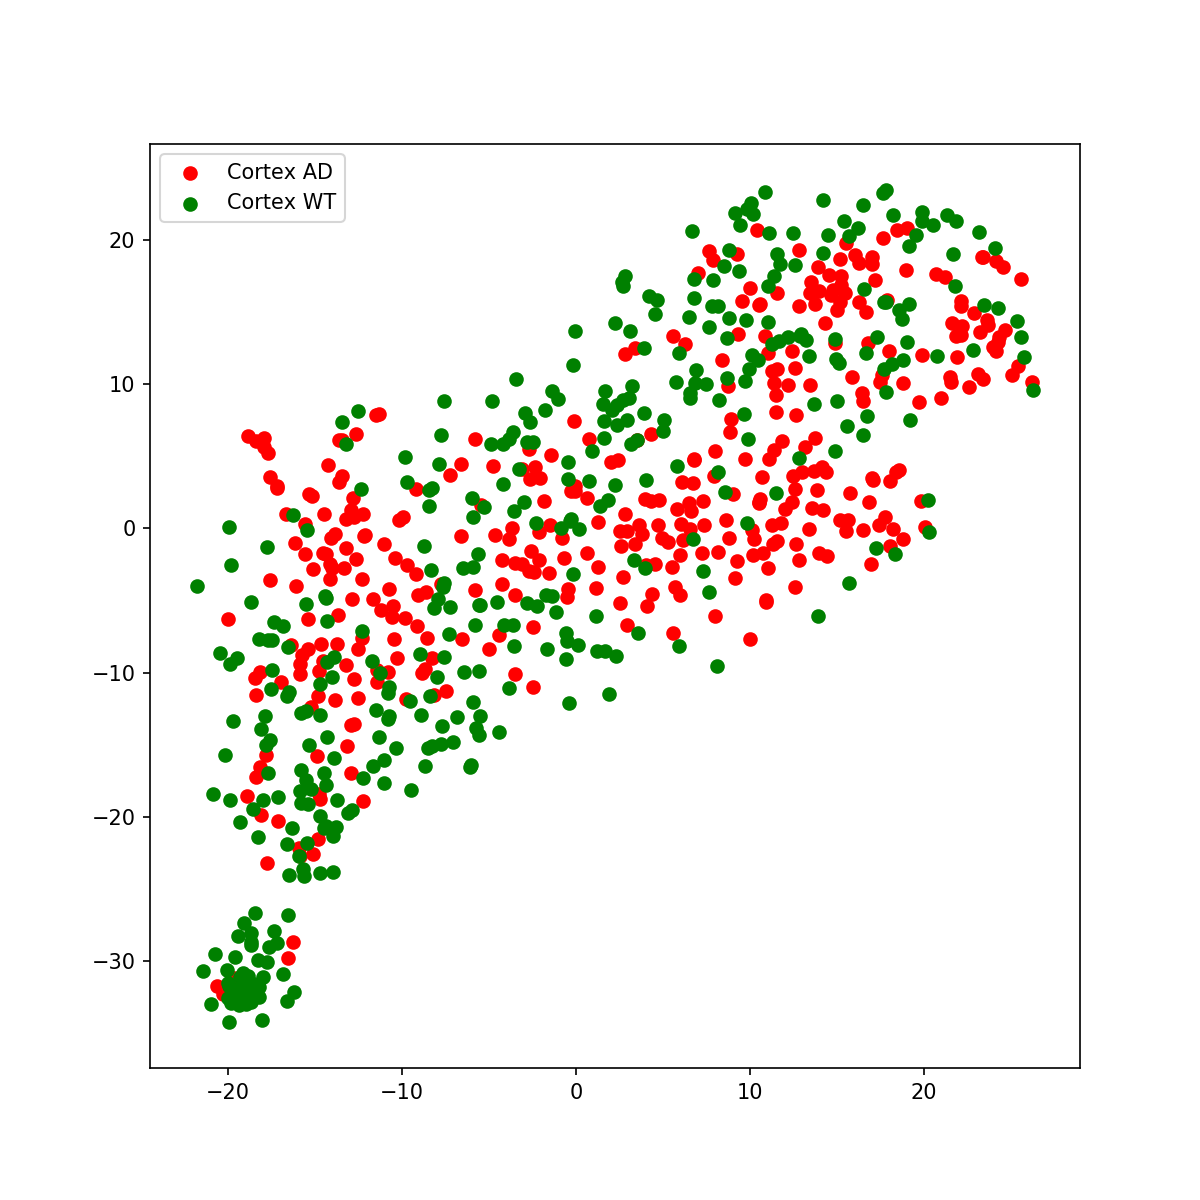

In [21]:
target_ids = range(1, len(gene_df[34016]))
y = np.hstack([gene_df[34016][gene_df[34016] == i] for i in [1, 2, 3, 4]])

from matplotlib import pyplot as plt
plt.figure(figsize=(8, 8))
colors = 'r', 'g' #в зависимости от количества типов нужно задать количество цветов

for i, c, label in zip(target_ids, colors, ["Cortex AD", "Cortex WT", "Cerebllum AD", "Cerebellum WT"]):
    plt.scatter(digits[y == i, 0], digits[y == i, 1], c=c, label=label) 
    #в качестве у должен подаваться вектор из чисел, вектор из строк он не признает
plt.legend()
plt.show()

In [7]:
digits = TSNE(random_state=0, n_components=2).fit_transform(X)

<IPython.core.display.Javascript object>


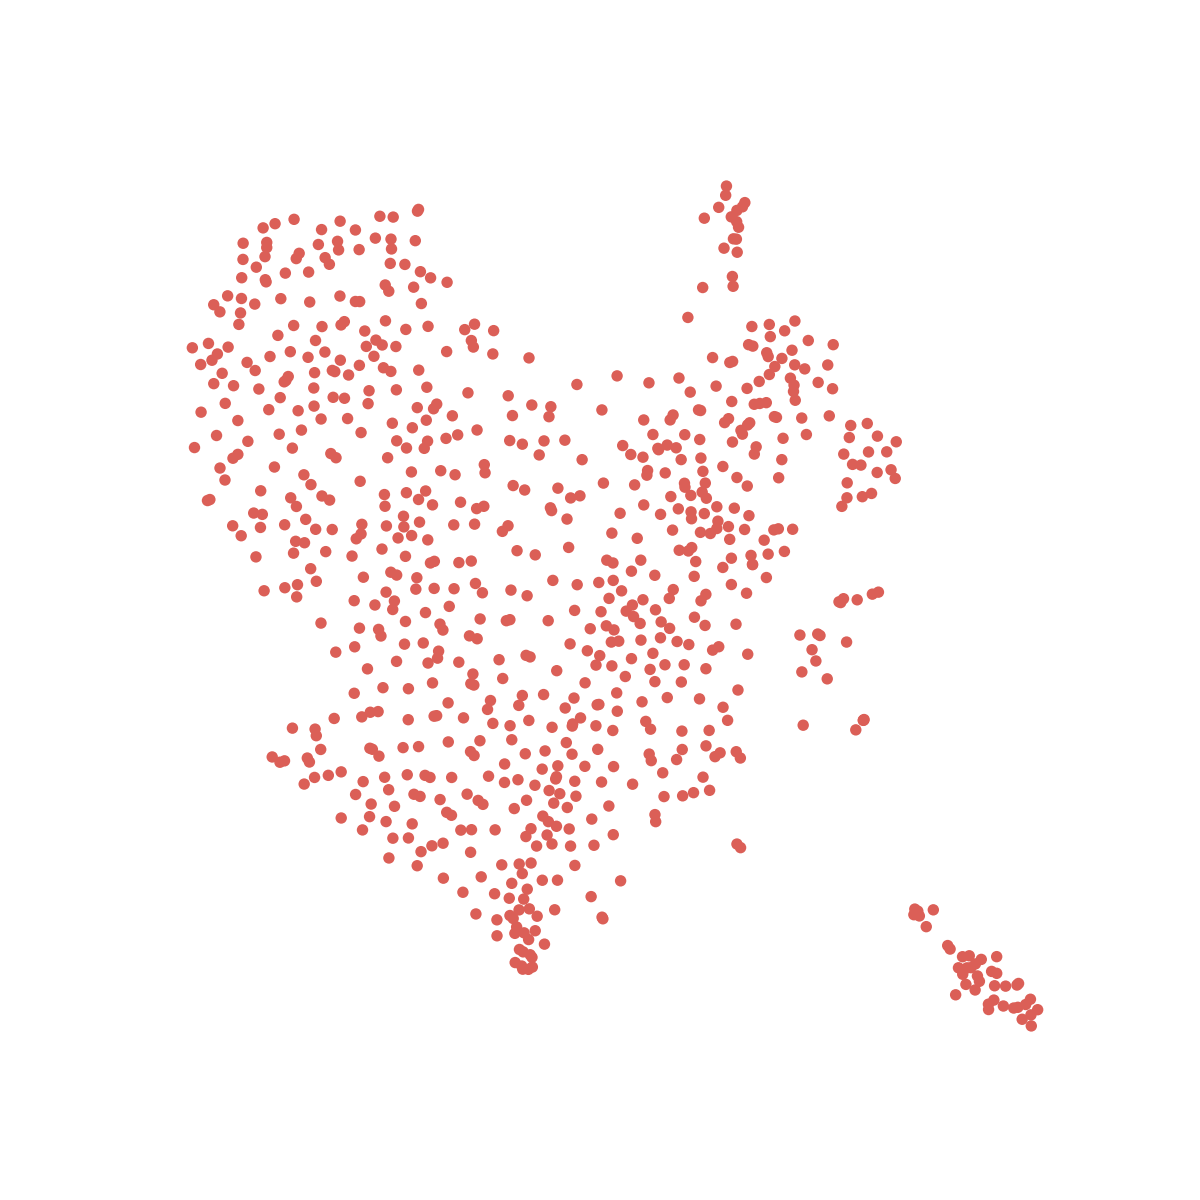

In [5]:
def scatter(x, colors):

    palette = np.array(sns.color_palette("hls", 1000))

    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=30, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    return f, ax, sc

scatter(digits, Y)
plt.legend()
plt.show()

In [5]:
plt.savefig('digits_tsne-generated.png', dpi=500)